<a href="https://colab.research.google.com/github/ArtemOsokin/psskad_mgpu_course/blob/main/LW/LW1/LW_1_Osokin_A_I_XPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. XPath

1. Установка и импорт библиотек

In [1]:
!pip install requests lxml


In [2]:
import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

2. Получение HTML кода целевой страницы для парсинга

In [3]:
url = "https://www.lendingtree.com/auto/?icid=mp24-home-be-auto-learn"
response = requests.get(url)
response.status_code

200

3. Получение HtmlElement объект из разметки

In [4]:
tree = html.fromstring(response.content)
tree

<Element html at 0x79b3a2f5a9d0>

4. Извлечение данных с помощью XPath

In [5]:
# НАименования банков
bank_names = tree.xpath('.//div[contains(@id, "partner-details-sec")]//h3//text()')
bank_names = [name.split(':')[0] for name in bank_names]
bank_names

['Navy Federal Credit Union',
 'Southeast Financial Credit Union',
 'PenFed Credit Union',
 'Bank of America',
 'Digital Federal Credit Union (DCU)',
 'Capital One',
 'PNC Bank',
 'LightStream',
 'Carvana',
 'Autopay',
 'Chase Bank']

In [6]:
# Лучше для ..
best_for = tree.xpath('.//table[contains(@id, "tablepress-9188")]//td[@class="column-2"]/text()')
best_for

['Those with military connections',
 'Short-term loans',
 'Using a car-buying service',
 'Those who prefer large banks',
 'Private-party auto loans',
 'Used car loans',
 'Prime and subprime rates',
 'No-collateral car loans',
 'An online experience',
 'Bad-credit auto loans',
 'Dealership purchases']

In [7]:
# Полная стоимость кредита

starting_APR = tree.xpath('.//table[contains(@id, "tablepress-9188")]//td[@class="column-3"]/text()')
starting_APR  = [
    element[:re.search(r'\d+\.\d\d', element).end()]
    if re.search(r'\d+\.\d\d', element) else None for element in starting_APR
]
starting_APR

['4.09',
 '4.25',
 '4.74',
 '5.59',
 '5.64',
 '5.99',
 '6.09',
 '7.24',
 '7.90',
 None,
 None]

In [8]:
# Условия кредита
loan_terms = tree.xpath('.//table[contains(@id, "tablepress-9188")]//td[@class="column-4"]/text()')
loan_terms = [element.strip() for element in loan_terms if '\n' not in element]

loan_terms

['12-96 months',
 '12-84 months',
 '36-84 months',
 '48-72 months',
 '12-84 months',
 'Up to 84 months',
 '36-72 months',
 '24-84 months',
 '36-78 months',
 '24-96 months',
 '12-84 months']

In [9]:
# Сумма кредита
loan_amounts = tree.xpath('.//table[contains(@id, "tablepress-9188")]//td[@class="column-5"]/text()')
loan_amounts

['From $250',
 'Up to  $100,000',
 'Up to $150,000',
 'From $7,500',
 '$5,000-$100,000',
 'Up to 130% of the car’s value',
 'From $4,000',
 '$5,000-$100,000',
 'From $1,000',
 '$2,500-$100,000',
 'From $4,000']

5. Создание DataFrame

In [10]:
data = {
  'Bank_Name': bank_names,
  'Best_for': best_for,
  'Starting_APR, %': starting_APR,
  'Loan_terms': loan_terms,
  'Loan_amounts': loan_amounts,
}
df = pd.DataFrame(data)
df

,Bank_Name,Best_for,"Starting_APR, %",Loan_terms,Loan_amounts
0,Navy Federal Credit Union,Those with military connections,4.09,12-96 months,From $250
1,Southeast Financial Credit Union,Short-term loans,4.25,12-84 months,"Up to $100,000"
2,PenFed Credit Union,Using a car-buying service,4.74,36-84 months,"Up to $150,000"
3,Bank of America,Those who prefer large banks,5.59,48-72 months,"From $7,500"
4,Digital Federal Credit Union (DCU),Private-party auto loans,5.64,12-84 months,"$5,000-$100,000"
5,Capital One,Used car loans,5.99,Up to 84 months,Up to 130% of the car’s value
6,PNC Bank,Prime and subprime rates,6.09,36-72 months,"From $4,000"
7,LightStream,No-collateral car loans,7.24,24-84 months,"$5,000-$100,000"
8,Carvana,An online experience,7.90,36-78 months,"From $1,000"
9,Autopay,Bad-credit auto loans,None,24-96 months,"$2,500-$100,000"


6. Предобработка данных

In [11]:
df['Starting_APR, %'] = pd.to_numeric(df['Starting_APR, %'], errors='coerce')
df

,Bank_Name,Best_for,"Starting_APR, %",Loan_terms,Loan_amounts
0,Navy Federal Credit Union,Those with military connections,4.09,12-96 months,From $250
1,Southeast Financial Credit Union,Short-term loans,4.25,12-84 months,"Up to $100,000"
2,PenFed Credit Union,Using a car-buying service,4.74,36-84 months,"Up to $150,000"
3,Bank of America,Those who prefer large banks,5.59,48-72 months,"From $7,500"
4,Digital Federal Credit Union (DCU),Private-party auto loans,5.64,12-84 months,"$5,000-$100,000"
5,Capital One,Used car loans,5.99,Up to 84 months,Up to 130% of the car’s value
6,PNC Bank,Prime and subprime rates,6.09,36-72 months,"From $4,000"
7,LightStream,No-collateral car loans,7.24,24-84 months,"$5,000-$100,000"
8,Carvana,An online experience,7.90,36-78 months,"From $1,000"
9,Autopay,Bad-credit auto loans,NaN,24-96 months,"$2,500-$100,000"


7. Анализ данных

In [12]:
print(df.describe())
print("\nТоп 5 с наибольшей полной стоимостью кредита:")
print(df.nlargest(5, 'Starting_APR, %')[['Bank_Name', 'Best_for', 'Loan_terms']])

       Starting_APR, %
count         9.000000
mean          5.725556
std           1.278369
min           4.090000
25%           4.740000
50%           5.640000
75%           6.090000
max           7.900000

Топ 5 с наибольшей полной стоимостью кредита:
                            Bank_Name                  Best_for  \
8                             Carvana      An online experience   
7                         LightStream   No-collateral car loans   
6                            PNC Bank  Prime and subprime rates   
5                         Capital One            Used car loans   
4  Digital Federal Credit Union (DCU)  Private-party auto loans   

        Loan_terms  
8     36-78 months  
7     24-84 months  
6     36-72 months  
5  Up to 84 months  
4     12-84 months  


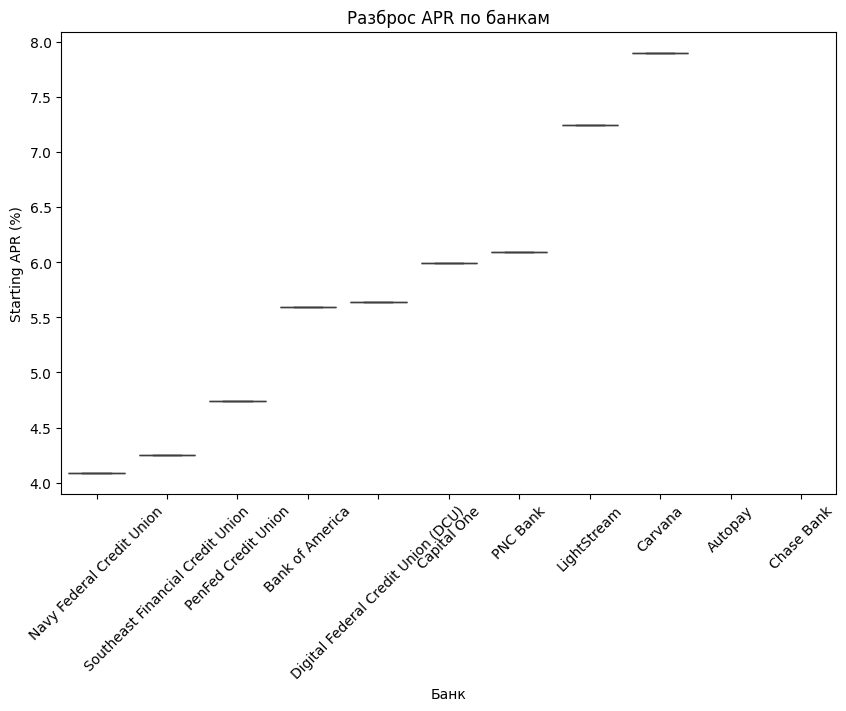

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bank_Name', y='Starting_APR, %', data=df)
plt.title('Разброс APR по банкам')
plt.xticks(rotation=45)
plt.xlabel('Банк')
plt.ylabel('Starting APR (%)')
plt.show()